# Homework 7: 

**DUE:** 5pm EST, April 30, 2020

### **Conceptual:** Short answer questions. Be concise

---

1. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in class and the _ILSR_ Chapter 8. The second approach is to classify based on the average probability. What is the final classification under each of these two approaches? What does the difference in classification aggregation (if any) tell us about tree approaches?

**Answer:**

Majority vote: count the classifications indicating one or the other class, make a prediction based on the majority of these classifications. In this case, there are more probabilities above .5, so we would classify as red.

Average probability: Average the probabilities and make a classification based on the outcome and make a prediction based on the mean. In this case, the average is .445, so we would classify as green.

The majority vote classification gives equal weight to each probability, such that outliers or extreme values do not have greater influence on the outcome. In the case of averaging the probabilities, extreme values have more importance.

---
2. Explain why out of bag (OOB) error provides a more reliable estimate of model test error than a more traditional hold out test set approach. 

**Answer:**
The out of bag error (OOB) is a built-in measure of test-set error, as it uses the approximately 1/3 observations that are not included in each bootstrapped model as a hold-out test set. The OOB observations are those that were not included in the fit of the original model, so they can be considered a hold-out test set, but can be compared against each bootstrapped model as the models are generated. The OOB error is as reliable as LOOCV and more reliable than a hold-out test set because it gives the model the opportunity to train on multiple train-test set splits and is less computationally costly than using LOOCV.


---

### **Applied:** Show your code & plots

We will use the HCP dataset for these problems. Include conceptual answers to questions as comments in code cells. You should use the tidyverse and class libraries for this assignment, as well as the data table for the HCP data set.

You will need to have the "tidyverse", "tree" and "randomForest" packages installed to answer these problems.


3. Use trees methods to predict unadjusted Flanker task (Flanker_Unadj) performance using a set of demographic, neural, and other cognitive factors. 


(a) Start by loading the HCP data and get a cleaned and tidy data table containing only Gender, Age, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol, WM_Task_Acc, ReadEng_Unadj, Language_Task_Acc, Dexterity_Unadj, PosAffect_Unadj, Relational_Task_Acc as our variables of interest.

In [1]:
# -------------------------------
# Question 3
# -------------------------------

# (a)
HCPdata <- read.csv("~/Github_Repo/DataScience2020/Maheux_DSPN_S20/Data/unrestricted_trimmed_1_7_2020_10_50_44.csv")


library(tidyverse)
HCPdata %>% dplyr::select(Gender, Age, Flanker_Unadj, FS_Tot_WM_Vol, 
                          FS_Total_GM_Vol, WM_Task_Acc, ReadEng_Unadj, 
                          Language_Task_Acc, Dexterity_Unadj, PosAffect_Unadj, 
                          Relational_Task_Acc) %>% na.omit() -> data


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



(b) Fit a regression tree model with Flanker_Unadj as the response variable and all others as predictor variables. Prune your tree to find the best model fit using as few terminal nodes as possible and show that the model fit improves after pruning. Plot your tree, plot tree size versues model deviance, determine the test accuracy on a hold out test set, and show a pruned model performance.



The downloaded binary packages are in
	/var/folders/s4/4g5lpcm12wb_tq2cjnz4gh240000gn/T//RtmprMSarR/downloaded_packages



Regression tree:
tree(formula = Flanker_Unadj ~ ., data = data, subset = train)
Variables actually used in tree construction:
[1] "Relational_Task_Acc" "Language_Task_Acc"   "FS_Total_GM_Vol"    
[4] "PosAffect_Unadj"     "FS_Tot_WM_Vol"       "Gender"             
[7] "Dexterity_Unadj"    
Number of terminal nodes:  14 
Residual mean deviance:  77.45 = 39110 / 505 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-23.51000  -5.90700   0.00857   0.00000   5.88400  33.26000 

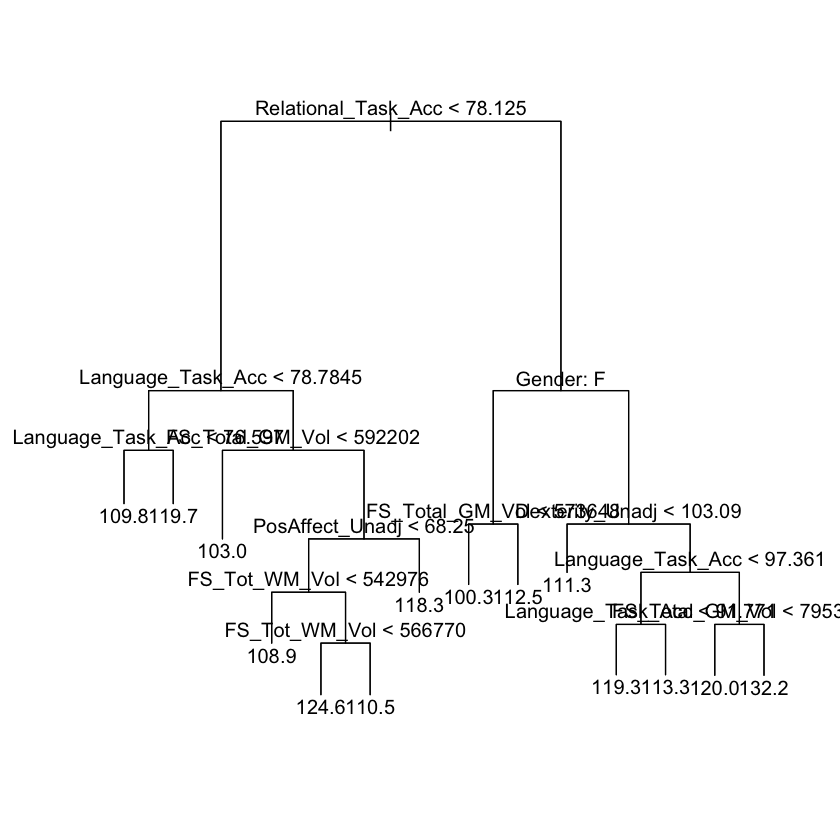

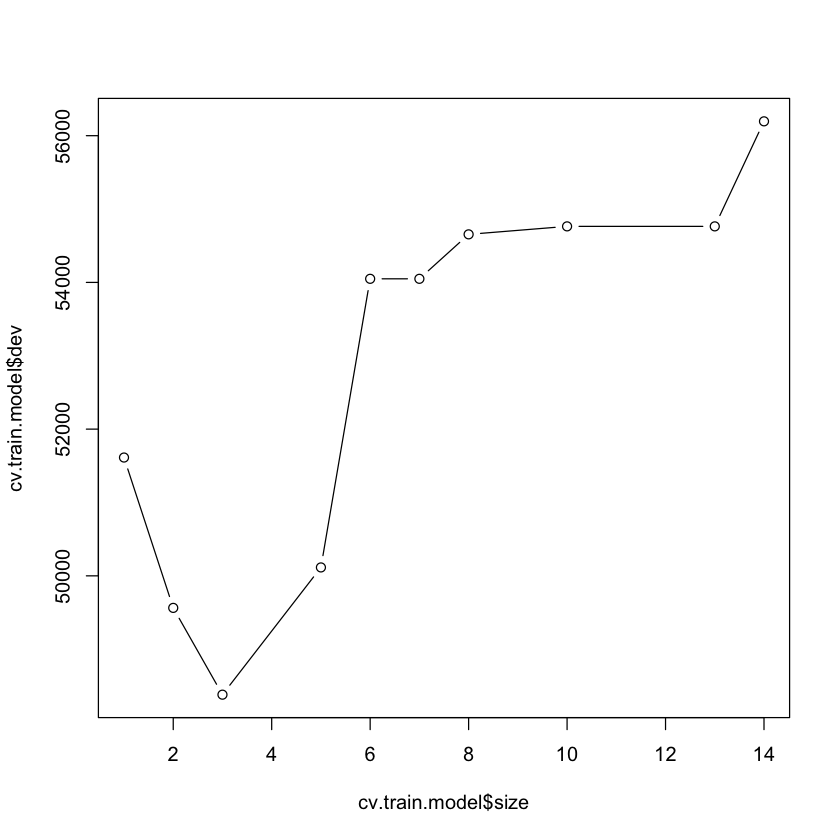

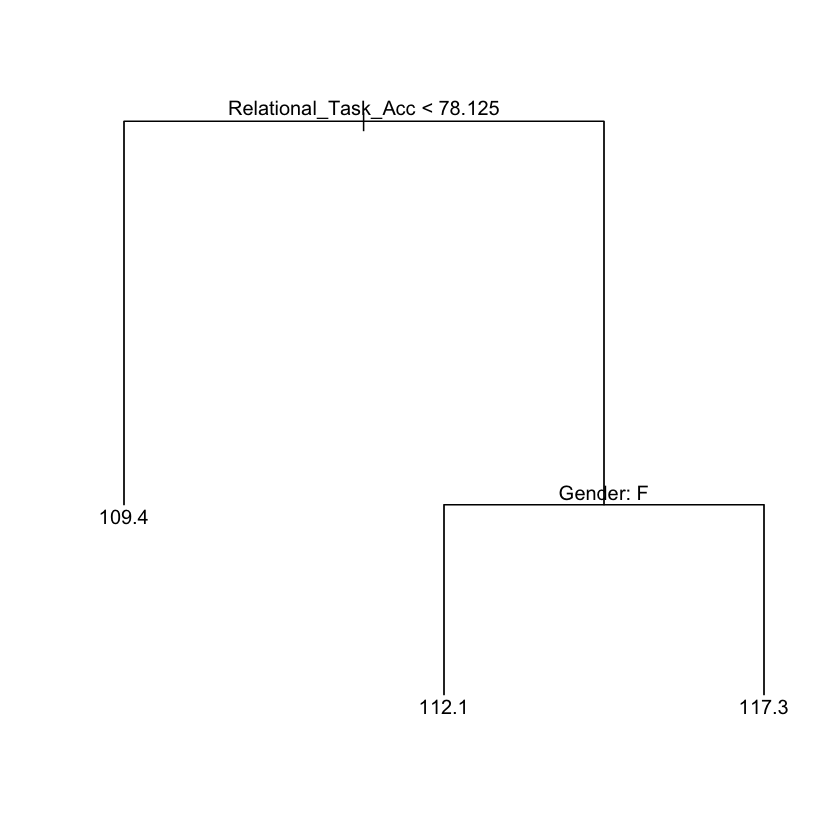

[1] 101.4852

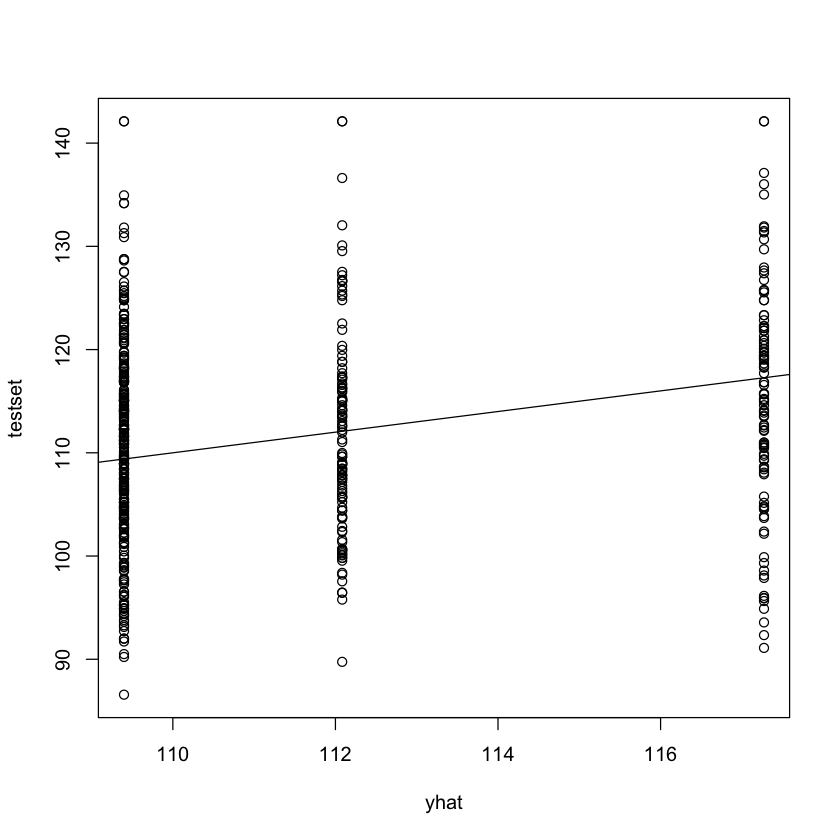

In [11]:
# (b)
install.packages("tree")
library(tree)

set.seed(3)
train = sample(1: nrow(data), nrow(data)/2)#create the training set
tree.model.train=tree(Flanker_Unadj~., data=data, subset=train) #fit the regression tree
summary(tree.model.train) #summarize

plot(tree.model.train)
text(tree.model.train, pretty=0)

cv.train.model=cv.tree(tree.model.train) 
plot(cv.train.model$size, cv.train.model$dev,type='b')

pruned.tree.train=prune.tree(tree.model.train,best=3) #selecting a 4-node tree
plot(pruned.tree.train)
text(pruned.tree.train,pretty=0)

yhat=predict(pruned.tree.train,newdata=data[-train ,])

testset=data[-train, "Flanker_Unadj"]
plot(yhat,testset)
abline(0,1)
mean((yhat-testset)^2)


4. Use the same data table to fit a classification tree with gender as the response variable and all others as predictor variables. Prune your tree and find the best model fit using as few terminal nodes as possible, and show that your model fit improves after pruning. Evaluate your model using a hold out test sample.


         testsetvalues
tree.pred   F   M
        F 228  61
        M  49 182

[1] 0.8942308

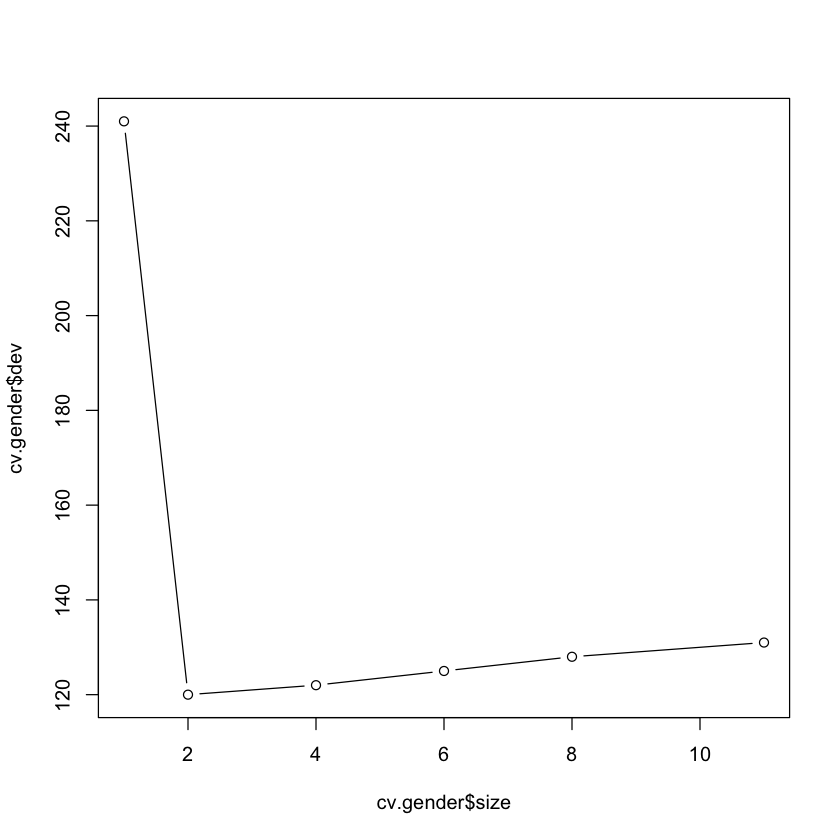

         testsetvalues
tree.pred   F   M
        F 254  81
        M  23 162

[1] 0.9096154

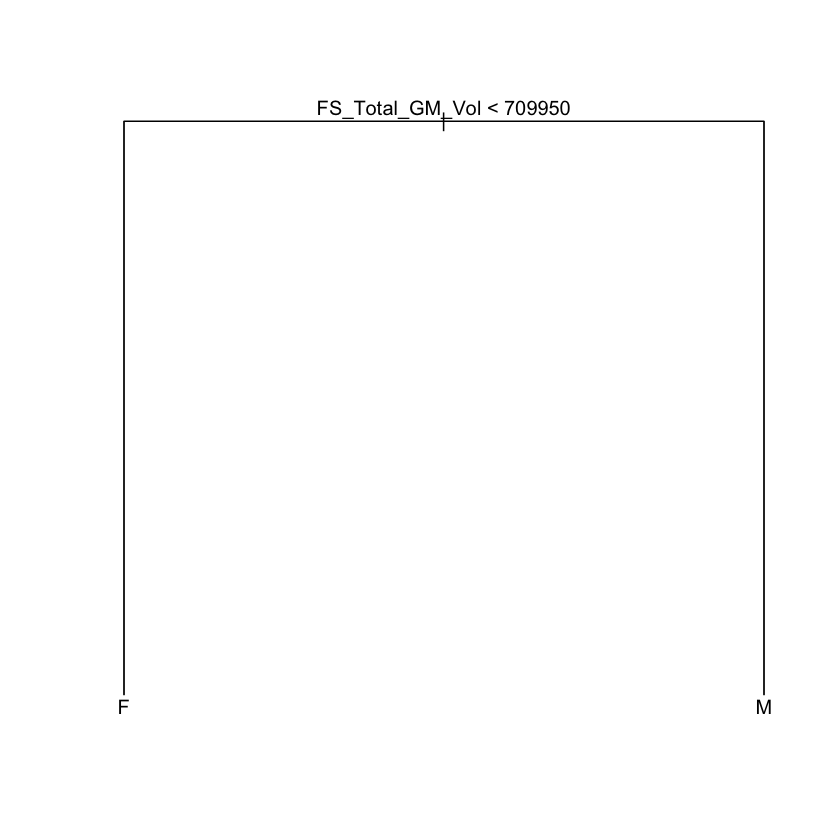

In [12]:
# -------------------------------
# Question 4
# -------------------------------
set.seed (2)
train = sample(1: nrow(data), nrow(data)/2) #create training set
tree.model2=tree(Gender~., data, subset=train) #tuned model
testset=data[-train,] #create the test set
tree.pred=predict(tree.model2, testset, type="class") #make predictions based on the tuned model with test set
testsetvalues=data[-train, "Gender"] #get just vector of test values for gender
table(tree.pred, testsetvalues) #classification accuracy of model


total_pruned_accuracy = (257+208)/length(testsetvalues) 
total_pruned_accuracy

set.seed(27)
cv.gender = cv.tree(tree.model2, FUN=prune.misclass) 
plot(cv.gender$size ,cv.gender$dev ,type="b") #looks like 2 nodes is best

prune.gender=prune.misclass(tree.model2,best=2)
plot(prune.gender) #plotting the newly pruned tree
text(prune.gender, pretty=0)


tree.pred=predict(prune.gender, testset, type="class")
table(tree.pred, testsetvalues)
total_pruned_accuracy = (292+181)/length(testsetvalues) 
total_pruned_accuracy

5. Use the same data table to fit a random forest model for the classification task with m = 3 Check test accuracy and visualize feature importance for classfying gender.  


The downloaded binary packages are in
	/var/folders/s4/4g5lpcm12wb_tq2cjnz4gh240000gn/T//RtmprMSarR/downloaded_packages



Call:
 randomForest(formula = Gender ~ ., data = data, mtry = 3, importance = TRUE,      subset = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 20.23%
Confusion matrix:
    F   M class.error
F 230  48   0.1726619
M  57 184   0.2365145

       testsetvalues
yhat.rf   F   M
      F 243  54
      M  34 189

[1] 0.8326923

,F,M,MeanDecreaseAccuracy,MeanDecreaseGini
Age,7.21617744,3.2667135,7.3182466,7.327265
Flanker_Unadj,3.63697940,-0.2891121,2.6519675,17.023736
FS_Tot_WM_Vol,25.11603452,18.1203547,30.6532130,57.534911
FS_Total_GM_Vol,37.65750183,34.9853516,50.5931420,78.941596
WM_Task_Acc,4.28834482,9.5846793,10.1959016,19.562116
ReadEng_Unadj,-0.00460707,5.0896788,3.7266196,15.377597
Language_Task_Acc,5.79171723,1.1916736,5.1180760,13.794233
Dexterity_Unadj,7.54124061,3.3019920,7.7824847,19.427020
PosAffect_Unadj,-0.76372106,0.4149042,-0.2292789,12.533286
Relational_Task_Acc,3.18933493,-0.1729481,2.2423434,16.237793


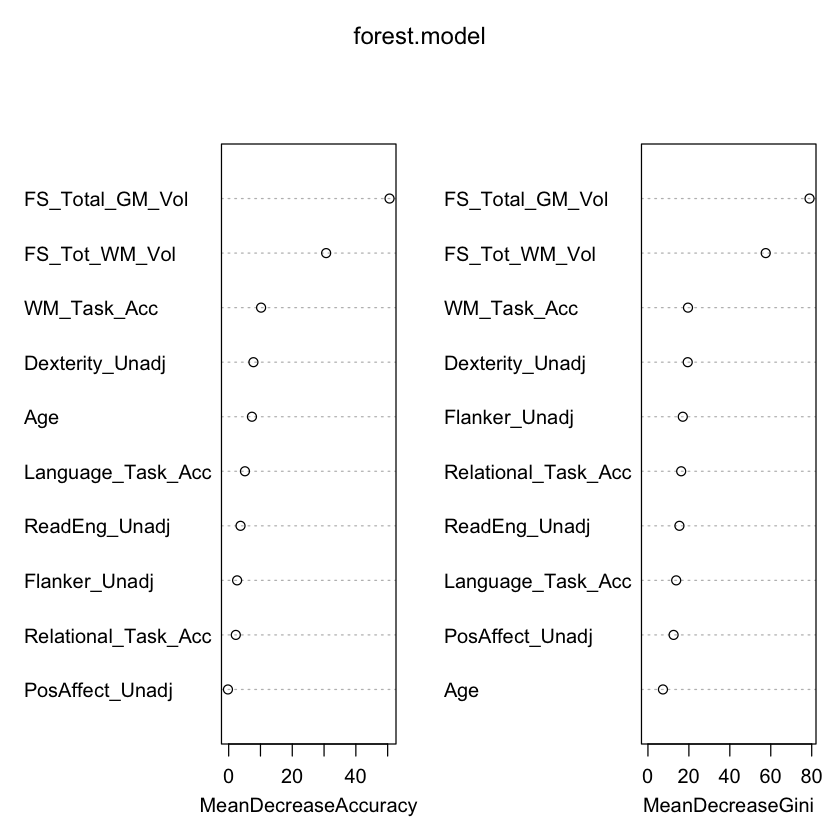

In [15]:
# -------------------------------
# Question 5
# -------------------------------



###########random forest
install.packages('randomForest')
library(randomForest)

data$Gender <- as.factor(data$Gender)
set.seed (2)
train = sample(1: nrow(data), nrow(data)/2)

forest.model=randomForest(Gender~., data=data, subset=train, mtry=3,
                        importance=TRUE)
forest.model


testsetvalues=data[-train, "Gender"]
yhat.rf = predict(forest.model, newdata=data[-train ,])

table(yhat.rf, testsetvalues)
total_pruned_accuracy = (243+190)/length(testsetvalues) 
total_pruned_accuracy

importance(forest.model)
varImpPlot(forest.model)
